## Step 1: Retrieve Data and Check Data Types




### Import Required Libraries

This code imports essential libraries for data analysis, visualization, preprocessing, and predictive modeling.  
Libraries include Pandas for data handling, NumPy for numerical computations, and scikit-learn and XGBoost for modeling.  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Load and Explore Flight Price Data
This section reads the CSV file containing flight price data for Bangladesh and displays the first five rows for an overview.  
It also uses `.info()` to show data types and detect any missing values.  


In [ ]:
flight_f = pd.read_csv('Flight_Price_Dataset_of_Bangladesh.csv')

In [ ]:
flight_f.head()

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [ ]:
flight_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Se

## Step 2 : Describe Data Types

### Identify Categorical and Numerical Features  
Here we separate object-type columns as categorical features and numeric types as continuous features.  
This helps decide appropriate preprocessing steps for each group.  


In [ ]:
category_columns = flight_f.select_dtypes(include=['object']).columns.tolist()
numerical_cols = flight_f.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
print("Categorical Columns:", category_columns)

Categorical Columns: ['Airline', 'Source', 'Source Name', 'Destination', 'Destination Name', 'Departure Date & Time', 'Arrival Date & Time', 'Stopovers', 'Aircraft Type', 'Class', 'Booking Source', 'Seasonality']


In [ ]:
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['Duration (hrs)', 'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)', 'Days Before Departure']


In [ ]:
flight_f.dtypes

,0
Airline,object
Source,object
Source Name,object
Destination,object
Destination Name,object
Departure Date & Time,object
Arrival Date & Time,object
Duration (hrs),float64
Stopovers,object
Aircraft Type,object


### Summary Statistics of Numerical Features  
Use `.describe()` to get count, mean, std, min/max and quartiles for all numeric columns.  
This gives a quick overview of distributions and potential outliers.  


In [ ]:
print(flight_f.describe())

       Duration (hrs)  Base Fare (BDT)  Tax & Surcharge (BDT)  \
count    57000.000000     57000.000000           57000.000000   
mean         3.994955     58899.556573           11448.238494   
std          4.094043     68840.614499           12124.344329   
min          0.500000      1600.975688             200.000000   
25%          1.003745      8856.316983             200.000000   
50%          2.644656     31615.996792            9450.940481   
75%          5.490104     85722.930389           17513.046160   
max         15.831719    449222.933770           73383.440066   

       Total Fare (BDT)  Days Before Departure  
count      57000.000000           57000.000000  
mean       71030.316199              45.460579  
std        81769.199536              26.015657  
min         1800.975688               1.000000  
25%         9602.699787              23.000000  
50%        41307.544990              45.000000  
75%       103800.906963              68.000000  
max       558987.33244

### Drop Unneeded Columns and Save Updated Dataset  
Remove source and destination names to focus on numeric and encoded features.  
Save the cleaned DataFrame to a new CSV for downstream modeling.  


In [ ]:
flight_f2 = flight_f.drop(['Source Name', 'Destination Name'], axis=1)

code `flight_f2.to_csv("Flight_Price_Dataset_Updated.csv", index=False)` saves the flight_f2 DataFrame to a new CSV file named Flight_Price_Dataset_Updated.csv. The `index = False` parameter ensures that the DataFrame's row indices are not included in the output file, keeping the CSV clean and focused on the actual data columns (e.g., Airline, Source, Destination, Total Fare (BDT)). This step preserves the updated dataset after removing redundant columns like Source Name and Destination Name for use in further analysis.

In [ ]:
flight_f2.to_csv("Flight_Price_Dataset_Updated.csv", index=False)

### Convert Date-Time Columns and Extract Features  
Transform departure and arrival timestamps to datetime type,  
then create separate columns for departure day and month to capture temporal patterns.  


In [ ]:
flight_f2['Departure Date & Time'] = pd.to_datetime(flight_f2['Departure Date & Time'])
flight_f2['Arrival Date & Time'] = pd.to_datetime(flight_f2['Arrival Date & Time'])
flight_f2['Departure_Day'] = flight_f2['Departure Date & Time'].dt.day
flight_f2['Departure_Month'] = flight_f2['Departure Date & Time'].dt.month

In [ ]:
flight_f2.head()

,Airline,Source,Destination,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,Departure_Day,Departure_Month
0,Malaysian Airlines,CXB,CCU,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10,17,11
1,Cathay Pacific,BZL,CGP,2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14,16,3
2,British Airways,ZYL,KUL,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83,13,12
3,Singapore Airlines,RJH,DAC,2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56,30,5
4,British Airways,SPD,YYZ,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90,25,4


## Step 3: Data cleaning

### Step 3.1: Check for duplicate or unnecessary data

### Check for Duplicate and Missing Values  
Count the number of fully duplicate rows and summarize missing values per column to assess data completeness.  


In [ ]:
duplicates = flight_f2.duplicated().sum()
print("Number of duplicate :", duplicates)

Number of duplicate : 0


### Step 3.2: Check for null values or missing data

In [ ]:
flight_f2.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Departure Date & Time,0
Arrival Date & Time,0
Duration (hrs),0
Stopovers,0
Aircraft Type,0
Class,0
Booking Source,0


### Step 3.3: Check for outliers and handle outlier



```
# This is formatted as code
```

### Visualize Outliers in Numeric Features  
Use boxplots to inspect the distribution and detect outliers for key fare-related columns.  


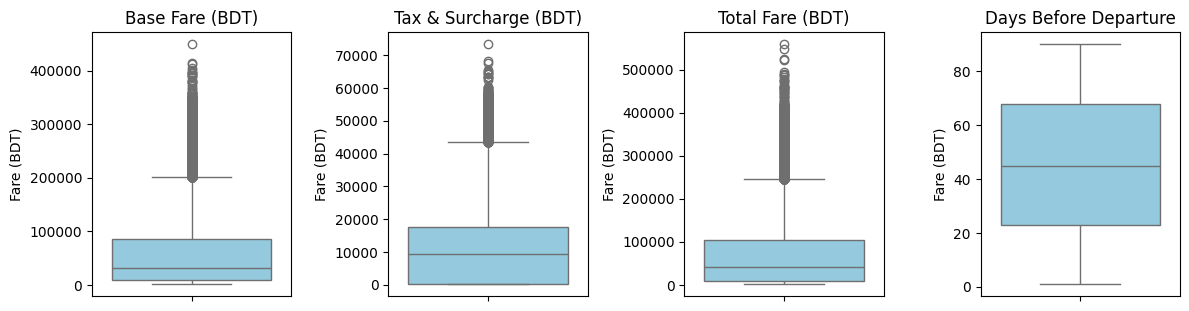

In [ ]:
num_col = ['Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)','Days Before Departure']

plt.figure(figsize=(12, 6))

for i, col in enumerate(num_col, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=flight_f2[col], color='skyblue')
    plt.title(col)
    plt.ylabel('Fare (BDT)')

plt.tight_layout()
plt.show()

**Intent of the Plot:**

Intent of the Plot:
The combined box plots show the distribution and variation of four flight pricing factors: Base Fare, Tax & Surcharge, Total Fare, and Days Before Departure. The goal is to understand how fares and booking times vary, how spread out the data is, and if there are outliers or skewness.

Short Description:

The first three plots (Base Fare, Tax & Surcharge, and Total Fare) represent amounts in BDT, while the fourth (Days Before Departure) shows the number of days.

Each plot displays the median (middle line), the interquartile range (the box), and the whiskers for normal data points. Small circles show outliers.

**Interpretation:**

Interpretation:

Base Fare, Tax & Surcharge, and Total Fare have wide variation and many expensive outliers.

Total Fare follows a similar pattern to Base Fare since it’s directly related.

Days Before Departure is more balanced without extreme outliers.

### Report Min and Max Before Outlier Handling  
Print the minimum and maximum values for each numeric column to quantify the range and identify extreme values.  


In [ ]:
import numpy as np


for col in num_col:

    print("Before handling outliers for", col, ": Min =", flight_f2[col].min(), ", Max =", flight_f2[col].max())

Before handling outliers for Base Fare (BDT) : Min = 1600.9756881504618 , Max = 449222.93377037166
Before handling outliers for Tax & Surcharge (BDT) : Min = 200.0 , Max = 73383.44006555574
Before handling outliers for Total Fare (BDT) : Min = 1800.9756881504618 , Max = 558987.332444109
Before handling outliers for Days Before Departure : Min = 1 , Max = 90


## Step 4: Create histogram for numerical variable

### Plot Histograms for Fare Features  
These histograms with KDE show the distribution of base fare, taxes, and total fare, helping to understand skewness and common price ranges.  


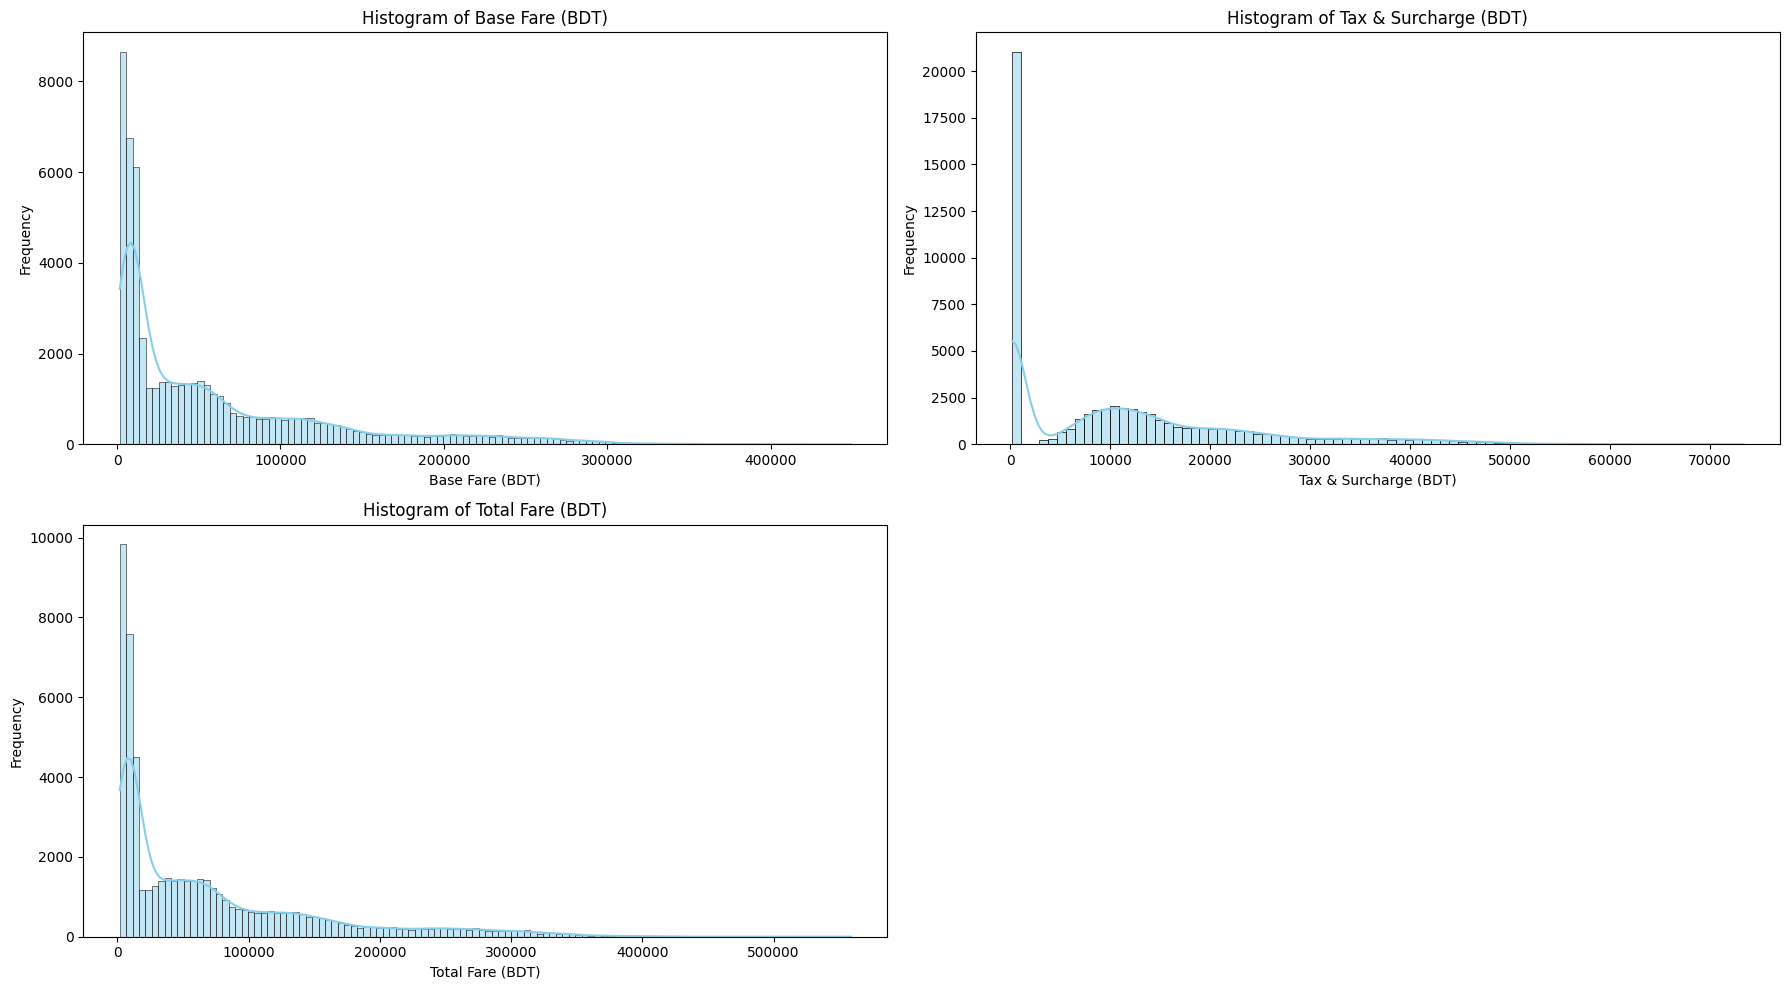

In [ ]:
num_col = ['Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)']

plt.figure(figsize=(18, 10))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 2, i)
    sns.histplot(flight_f2[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms show the spread and shape of Base Fare, Tax & Surcharge, and Total Fare.

All three distributions are highly right-skewed — most fares are low, but a few are extremely high.

A smooth curve (KDE) is added to highlight the distribution shape.

Most Total Fares are below 100,000 BDT.
The Base Fare and Tax & Surcharge are skewed similarly, causing the Total Fare to also be skewed.




## Step 7: Check distribution using boxplot after removing outliers

### Count Outliers per Fare Feature  
Compute IQR-based lower/upper bounds and count how many values lie outside these limits for each fare column.  
This quantifies the extent of extreme values before cleaning.  


In [ ]:
for col in num_col:
    Q1 = flight_f2[col].quantile(0.25)
    Q3 = flight_f2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = flight_f2[(flight_f2[col] < lower_bound) | (flight_f2[col] > upper_bound)]
    print(col, ":", len(outliers))

Base Fare (BDT) : 3772
Tax & Surcharge (BDT) : 1226
Total Fare (BDT) : 3409


### Clip Outliers to IQR Bounds  
Create a cleaned copy by capping values at the calculated lower and upper IQR bounds to reduce the influence of extremes.  


In [ ]:
flight_f2_clean = flight_f2.copy()
for col in num_col:
    Q1 = flight_f2[col].quantile(0.25)
    Q3 = flight_f2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    flight_f2_clean[col] = flight_f2_clean[col].clip(lower=lower_bound, upper=upper_bound)

### Boxplots After Outlier Handling  
Visualize the effect of clipping by red boxplots, confirming that extreme whiskers have been brought within bounds.  


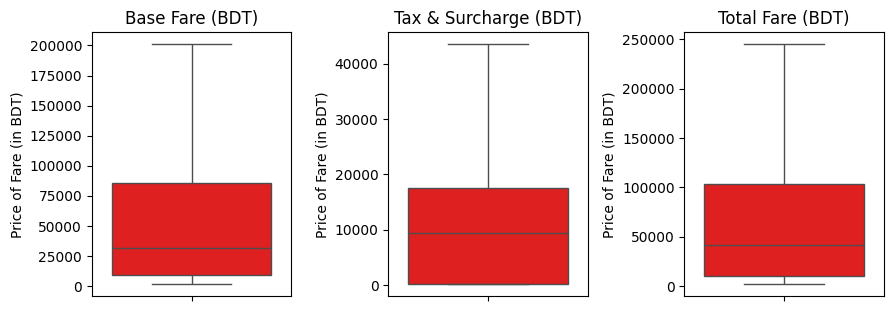

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=flight_f2_clean[col], color='red')
    plt.title(col)
    plt.ylabel('Price of Fare (in BDT)')

plt.tight_layout()
plt.show()



*   Base Fare (BDT):

1.   Middle 50% (IQR): 8,856.32 BDT to 85,722.93 BDT.
2.  Median: ~47,000 BDT.
3.  Whiskers: 0 BDT to 175,000 BDT.
4.   No outliers (removed).

* Tax & Surcharge (BDT):
1. Middle 50% (IQR): 200.0 BDT to 17,513.05 BDT.
2. Median: ~8,000 BDT.
3. Whiskers: 0 BDT to 35,000 BDT.
4. No outliers (removed).

* Total Fare (BDT):
1. Middle 50% (IQR): 9,602.70 BDT to 103,800.91 BDT.
2. Median: ~55,000 BDT.
3. Whiskers: 0 BDT to 210,000 BDT.
4. No outliers (removed).




### Report Min/Max After Cleaning  
Print the new minimum and maximum values for each fare column to verify that outliers have been capped correctly.  


In [ ]:
import numpy as np

for col in num_col:
    print("After handling outliers for", col,
          ": Min =", flight_f2_clean[col].min(),
          ", Max =", flight_f2_clean[col].max())


After handling outliers for Base Fare (BDT) : Min = 1600.9756881504618 , Max = 201022.85049769032
After handling outliers for Tax & Surcharge (BDT) : Min = 200.0 , Max = 43482.61539889917
After handling outliers for Total Fare (BDT) : Min = 1800.9756881504618 , Max = 245098.21772608167


### IQR Range for Cleaned Features  
Compute and display the 25th–75th percentile range for each fare feature, representing the central distribution post-cleaning.  


In [ ]:



for col in num_col:
    q1 = np.percentile(flight_f2_clean[col], 25)
    q3 = np.percentile(flight_f2_clean[col], 75)
    price_range_lower = q1
    price_range_upper = q3
    print("Range for", col, ": from", price_range_lower, "to", price_range_upper)

Range for Base Fare (BDT) : from 8856.31698280503 to 85722.93038875915
Range for Tax & Surcharge (BDT) : from 200.0 to 17513.046159559668
Range for Total Fare (BDT) : from 9602.699786836121 to 103800.90696253434


### Histograms of Cleaned Fare Distributions  
Plot KDE histograms for each fare column after outlier treatment to observe the smoothed data distribution and detect remaining skew.  


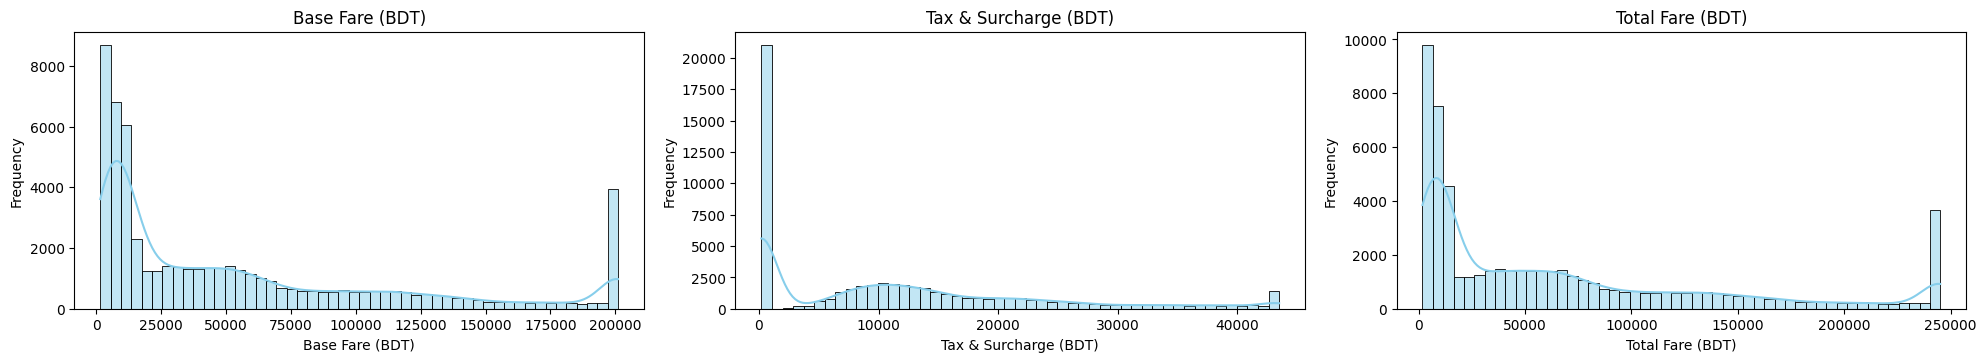

In [ ]:

plt.figure(figsize=(20, 10))
for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.histplot(flight_f2_clean[col], kde=True, color='skyblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* **Base Fare (BDT):** The distribution is heavily skewed to the right, meaning most base fares are low. There is a large peak in frequency near 0 BDT, with frequencies decreasing significantly for higher fares. The data spreads out towards higher values, visible up to around 200,000 BDT.
* **Tax & Surcharge (BDT):** This distribution is extremely skewed to the right. The vast majority of tax and surcharge values are concentrated in a very tall peak right at or near 0 BDT. Frequencies drop off very steeply for any higher amounts shown, up to around 40,000 BDT.
* **Total Fare (BDT):** The distribution is also skewed to the right, but less extremely than Tax & Surcharge. There is a prominent peak in frequency near 0 BDT, and frequencies decrease as the total fare increases. The data extends up to around 250,000 BDT, showing that while lower fares are most common, higher total fares do occur with decreasing frequency.

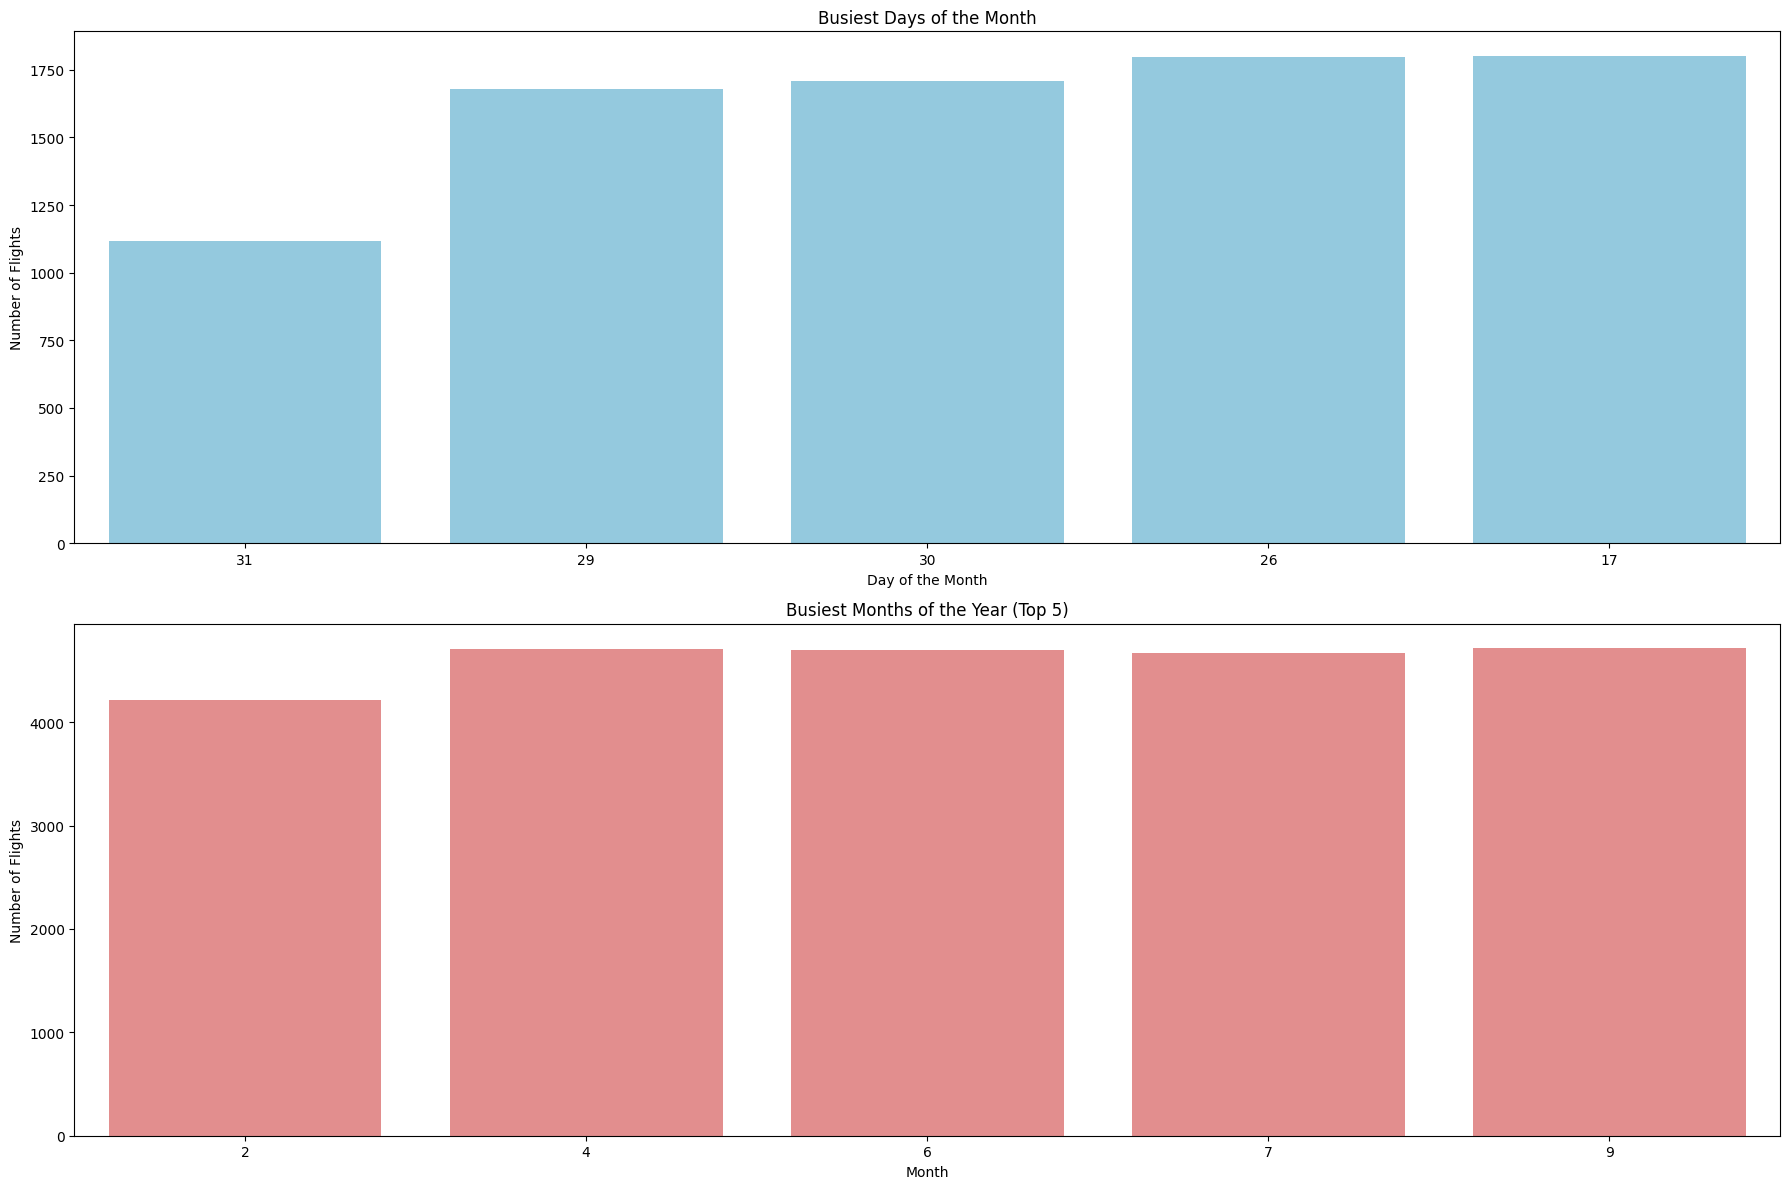

In [ ]:
top_5_months=flight_f2_clean['Departure_Month']
top_5_days = flight_f2_clean['Departure_Day']

sorted_top_5_months = top_5_months.value_counts().sort_values(ascending=True).head(5)
sorted_top_5_days = top_5_days.value_counts().sort_values(ascending=True).head(5)


plt.figure(figsize=(18, 12))

plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=sorted_top_5_days.index, y=sorted_top_5_days.values, color='skyblue', order =sorted_top_5_days.index)
plt.title('Busiest Days of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Flights')

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=sorted_top_5_months.index, y=sorted_top_5_months.values, color='lightcoral')
plt.title('Busiest Months of the Year (Top 5)')
plt.xlabel('Month')
plt.ylabel('Number of Flights')

plt.tight_layout()
plt.show()


* The charts identify the **top 5 busiest days of the month** and the **top 5 busiest months of the year** by the number of flights.
* For **Busiest Days of the Month**, days 17, 26, 29, 30, and 31 are shown as the busiest.
* For **Busiest Months of the Year**, months 2 (February), 4 (April), 6 (June), 7 (July), and 9 (September) are highlighted as having the highest flight activity among the top months.

### Average Total Fare by Seasonality  
Group by categorical seasonality and plot mean total fare to reveal how ticket prices vary across seasons.  


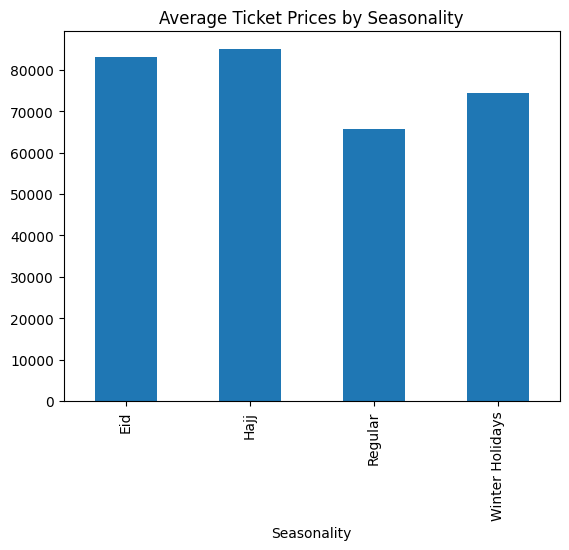

In [ ]:
seasonal_prices = flight_f2_clean.groupby('Seasonality')['Total Fare (BDT)'].mean()

seasonal_prices.plot.bar()

plt.title('Average Ticket Prices by Seasonality')

plt.show()



the chart indicates that average ticket prices are highest during Hajj and Eid periods, significantly lower during Regular periods, and moderately higher than Regular periods during Winter Holidays.





## Step 8: Use One hot encoding with Principal Component Analysis (PCA) for categorical data

### Select and Clean Categorical Features  
Define the list of categorical columns and drop any rows with missing values in these fields to ensure a complete encoding.  


In [ ]:
cat_cols = ['Airline', 'Source', 'Destination', 'Stopovers', 'Aircraft Type', 'Class',
            'Booking Source', 'Seasonality', 'Departure_Month', 'Departure_Day']

flight_f2_clean = flight_f2_clean.dropna(subset=cat_cols)


### One-Hot Encode Categorical Variables  
Apply OneHotEncoder to convert each category into binary indicator features, producing a dense array for modeling.  


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(flight_f2_clean[cat_cols])

### Combine Encoded and Numeric Data, Then Standardize  
Concatenate the one-hot matrix with the numeric ‘Departure_Day’, reset indices, and scale all features to zero mean and unit variance.  


In [ ]:
from sklearn.preprocessing import StandardScaler

X_combined = pd.concat(
    [pd.DataFrame(encoded_data), flight_f2_clean[['Departure_Day']].reset_index(drop=True)],
    axis=1
)
X_combined.columns = X_combined.columns.astype(str)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)


### Determine PCA Components for 95% Variance  
Fit PCA on the scaled data, compute cumulative explained variance, and select the number of components needed to exceed 95%.  


In [ ]:
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components_95 = (cumulative_variance <= 0.95).sum() + 1


### Apply PCA Reduction and Inspect Results  
Refit PCA with the chosen component count, transform the data, and display the explained variance ratios and the first few PCA feature values.  


In [ ]:
pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components that explain 95% of the variance: {n_components_95}")
print("Explained variance ratio for each component:")
print(pca.explained_variance_ratio_)

pca_df = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(n_components_95)])
print(pca_df.head())


Number of components that explain 95% of the variance: 93
Explained variance ratio for each component:
[0.03475948 0.02514509 0.02099263 0.01835515 0.01354089 0.01327956
 0.01323271 0.01321122 0.01309408 0.01252817 0.01069814 0.01067916
 0.01067482 0.01062452 0.01060606 0.01060458 0.01058314 0.01048272
 0.01024919 0.01018336 0.00994797 0.00989995 0.00975678 0.00974209
 0.00973533 0.00970535 0.00969949 0.00967836 0.00961453 0.00956088
 0.00953231 0.00950375 0.0094814  0.00947301 0.00944265 0.00942991
 0.00941697 0.00940098 0.00938892 0.0093729  0.00934414 0.0093264
 0.0093211  0.00930406 0.0092926  0.00928437 0.00926133 0.00923957
 0.00922886 0.00922366 0.00920593 0.00919149 0.00918501 0.00916227
 0.00915077 0.00914651 0.00911806 0.00911564 0.00910858 0.00908811
 0.00907419 0.00906852 0.00904948 0.00904457 0.00902792 0.00901436
 0.00901156 0.00899853 0.00899685 0.00897214 0.00895672 0.00894007
 0.00893384 0.00893067 0.00890993 0.00890345 0.00888649 0.00887383
 0.00886967 0.00884533 0.00

## Step 9: Hypothesis Testing

### Step 9.1: Create hypotheses

#### Define Hypotheses for Data Analysis  
List the key assumptions about duplicates, missing values, outliers, feature effects, and PCA to be tested quantitatively.  


In [ ]:
hypotheses = [
    "H1: The dataset contains duplicate records that should be removed to ensure accurate analysis.",
    "H2: Missing values, if present in any feature, may distort analysis and model performance.",
    "H3: Outliers exist in the fare-related columns (Base Fare, Tax & Surcharge, Total Fare) and may negatively affect model performance.",
    "H4: Removing or capping outliers in fare columns will lead to a more normal distribution and improve data quality.",
    "H5: The Total Fare is strongly correlated with both the Base Fare and the Tax & Surcharge.",
    "H6: The Base Fare contributes more to the Total Fare than the Tax & Surcharge.",
    "H7: The day, month, hour, and weekday of departure significantly influence flight prices.",
    "H8: Flights departing on weekends or during holiday seasons (high seasonality) are more expensive.",
    "H9: Airline choice significantly affects the total flight fare.",
    "H10: The number of stopovers, booking source, and travel class are major contributors to fare variation.",
    "H11: PCA on encoded categorical + temporal features can reduce dimensionality while retaining meaningful variation.",
    "H12: Visualizing the top two PCA components reveals natural clusters of flights based on similar fare-related characteristics."
]

for h in hypotheses:
    print(h)

H1: The dataset contains duplicate records that should be removed to ensure accurate analysis.
H2: Missing values, if present in any feature, may distort analysis and model performance.
H3: Outliers exist in the fare-related columns (Base Fare, Tax & Surcharge, Total Fare) and may negatively affect model performance.
H4: Removing or capping outliers in fare columns will lead to a more normal distribution and improve data quality.
H5: The Total Fare is strongly correlated with both the Base Fare and the Tax & Surcharge.
H6: The Base Fare contributes more to the Total Fare than the Tax & Surcharge.
H7: The day, month, hour, and weekday of departure significantly influence flight prices.
H8: Flights departing on weekends or during holiday seasons (high seasonality) are more expensive.
H9: Airline choice significantly affects the total flight fare.
H10: The number of stopovers, booking source, and travel class are major contributors to fare variation.
H11: PCA on encoded categorical + temp

### Step 9.2: Statistical test

#### Pearson Correlation (H5 & H6)

#### Pearson Correlation between Numeric Features and Total Fare  
Calculate Pearson’s r and p-value for base fare, tax, day and month against total fare to assess linear relationships.  


In [ ]:
from scipy.stats import pearsonr

num_cols = ['Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)', 'Departure_Day', 'Departure_Month']

for col in num_cols:
    corr, p_value = pearsonr(flight_f2_clean[col], flight_f2_clean['Total Fare (BDT)'])
    print(f"Correlation between {col} and Total Fare: r = {corr:.4f}, p = {p_value:.5f}")

Correlation between Base Fare (BDT) and Total Fare: r = 0.9985, p = 0.00000
Correlation between Tax & Surcharge (BDT) and Total Fare: r = 0.9827, p = 0.00000
Correlation between Total Fare (BDT) and Total Fare: r = 1.0000, p = 0.00000
Correlation between Departure_Day and Total Fare: r = -0.0035, p = 0.39884
Correlation between Departure_Month and Total Fare: r = -0.0075, p = 0.07190


If `p < 0.05`, the correlation is statistically significant.

Higher `r` means stronger linear relationship.



#### ANOVA Test (H9 & H10)

#### One-Way ANOVA for Categorical Features  
Perform ANOVA tests on Total Fare grouped by airline, stopovers, class, booking source, and seasonality to check for significant mean differences.  


In [ ]:
from scipy.stats import f_oneway

cat_features = ['Airline', 'Stopovers', 'Class', 'Booking Source', 'Seasonality']

for cat in cat_features:
    groups = [group["Total Fare (BDT)"].values for _, group in flight_f2_clean.groupby(cat)]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA for {cat}: F = {f_stat:.2f}, p = {p_val:.5f}")

ANOVA for Airline: F = 1.38, p = 0.10615
ANOVA for Stopovers: F = 4236.58, p = 0.00000
ANOVA for Class: F = 7598.14, p = 0.00000
ANOVA for Booking Source: F = 0.05, p = 0.94672
ANOVA for Seasonality: F = 68.22, p = 0.00000


If `p < 0.05`, the categorical feature has a significant impact on Total Fare.

#### ANOVA for Time-Based Features (H7 & H8)

#### One-Way ANOVA for Temporal Features  
Test whether the day of month or month of departure leads to significantly different average total fares.  


In [ ]:
from scipy.stats import f_oneway

time_cats = ['Departure_Day', 'Departure_Month']

for time_col in time_cats:
    groups = [group["Total Fare (BDT)"].values for _, group in flight_f2_clean.groupby(time_col)]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA for {time_col}: F = {f_stat:.2f}, p = {p_val:.5f}")

ANOVA for Departure_Day: F = 1.18, p = 0.23337
ANOVA for Departure_Month: F = 13.50, p = 0.00000


### 7. What are the hypotheses testing?

**What are the hypotheses testing?**

Hypothesis testing is a formal statistical method used to make decisions or inferences about data.

It helps you prove or disprove certain assumptions (hypotheses) you have about your dataset.

In simple terms:

    *  You start with a belief about the data (your hypothesis).
    *  You collect evidence (data and calculations).
    *  You test whether your belief is statistically supported or not.

Each hypothesis (H1 to H12) is targeting a different aspect of the data. Some focus on data quality (duplicates, missing values, outliers), some on relationships (correlations, feature importance), and some on dimensionality reduction and clustering.

**In this case:**

Each hypothesis (H1 to H12) is making a specific claim about the dataset.
You then use statistical tests (like Pearson correlation and ANOVA) to check if there is enough evidence to support or reject these claims.

**Specifically:**

For continuous variables (like fares), you test correlation between them.

For categorical variables (like Airline, Class, Booking Source), you test whether group differences are significant using ANOVA.


**The purpose of your hypotheses testing is to:**

1. Assess Data Quality:

(e.g., Are there duplicates? Are there missing values? Are there extreme outliers?)

2. Understand Relationships:

(e.g., Is Total Fare related more to Base Fare or Tax? Does departure time affect prices?)

3. Validate Feature Importance:

(e.g., Which variables (like Airline, Stopovers, Seasonality) influence fare variation?)

4. Improve Data for Modeling:

(e.g., Remove bad data, identify key factors that models should learn.)

5. Prepare for Advanced Analysis:

(e.g., Is dimensionality reduction via PCA reasonable based on the structure of the data?)

## Step 10: Apply machine learning classifiers and compare the results

### Encode Categorical & Assemble Feature Matrix  
Convert selected categorical columns into one-hot vectors (ignoring unseen categories),  
then concatenate with numeric fare features to form the full predictor matrix X and target y.  


In [ ]:
cat_cols = ['Airline', 'Stopovers', 'Class', 'Booking Source', 'Seasonality', 'Departure_Day', 'Departure_Month']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cat = encoder.fit_transform(flight_f2_clean[cat_cols])

X = np.concatenate([encoded_cat, flight_f2_clean[['Base Fare (BDT)', 'Tax & Surcharge (BDT)']].values], axis=1)
y = flight_f2_clean['Total Fare (BDT)']

### Split into Training & Test Sets  
Use an 80/20 split with a fixed random state for reproducibility of model evaluation.  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define and Fit Regression Models  
Instantiate four algorithms—Linear Regression, Decision Tree, Random Forest, and XGBoost—  
then train each on the training data.  


In [ ]:
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

### Evaluate Model Performance  
Predict on the test set and compute MAE, MSE, RMSE, and R² for each model to compare accuracy.  


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for name, model in models.items():
    model.fit(X_train, y_train)

# 2) Predict & evaluate
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
print(results_df)

                           MAE           MSE         RMSE  R2 Score
Linear Regression  1099.631411  9.483375e+06  3079.508904  0.998204
Decision Tree       947.630649  1.954250e+07  4420.690092  0.996299
Random Forest       907.543878  1.055347e+07  3248.609993  0.998002
XGBoost            1043.888731  1.040891e+07  3226.284967  0.998029


## Exploratory Data Analysis (EDA)

### 1. What question(s) are we trying to solve?


**1.1 How are ticket prices spread out?**

The ticket prices are distributed across different ranges, as follows:

Base fares range from 8,856.32 BDT to 85,722.93 BDT.

Taxes and fees range from 200.0 BDT to 17,513.05 BDT.

Total fares range from 9,602.70 BDT to 103,800.91 BDT.

Helping with decisions: If some prices aren't popular, the company can change its pricing or offer special deals. For example, offering discounts for lower prices or premium services for higher prices.

By analyzing these patterns, the company can improve pricing strategies, target the right customers, and increase profits.




**How do unusually high ticket prices affect overall pricing?**

Box plots show that most ticket prices are in a normal range, but a few very high prices (like over 85,722.93 BDT for base fare and 103,800.91 BDT for total fare) can make the average look higher than what most customers actually pay.

Why is this a problem?

It can lead to:

Overestimating revenue

Setting prices too high

Making wrong marketing decisions



**1.3 What do ticket prices look like after removing extremely high values?**



After removing extreme prices, box plots show the most common price ranges:

**Base Fare:** The middle 50% of prices are between approximately 8,856.32 BDT and 85,722.93 BDT, meaning most trips have a base fare within this range.

**Tax & Surcharge:** The middle 50% of values are between approximately 200.0 BDT and 17,513.05 BDT, indicating most trips have taxes and surcharges within this range.

**Total Fare:** The middle 50% of prices are between approximately 9,602.70 BDT and 103,800.91 BDT, showing that the total fare for most trips falls within this range.



**1.4. What are the main factors affecting the total fare and how can we improve our pricing strategies based on them?**

Based on the analysis, here are the main factors affecting the total fare:

Base Fare:

The correlation between "Base Fare" and "Total Fare" is r = 0.9985, which means changes in the base fare strongly affect the total fare.

Action: Adjust the base fare based on demand and seasonality (e.g., raise prices during peak times and lower them during off-peak times).

Tax & Surcharge:

The correlation between "Tax & Surcharge" and "Total Fare" is r = 0.9827, showing that taxes and extra charges impact the total fare significantly.

Action: Optimize taxes and surcharges, and offer discounts on these fees during off-peak periods or for certain customer groups.

Departure Day:

The correlation between "Departure Day" and "Total Fare" is r = -0.0035, which means the departure day has little to no effect on the total fare.

Action: Don’t focus on the departure day when setting prices since it doesn’t affect the fare much.

Departure Month:

The month of departure shouldn't be a major factor in setting prices, but trends in demand can still be monitored.



**1.5. Which factors affect the total fare and how can we adjust pricing to maximize revenue?**

Answer:

Based on the analysis, the factors that impact the total fare are:

Stopovers: Flights with stopovers have a strong impact on fare pricing.

Action: Offer lower fares for direct flights and higher fares for stopovers.

Class: Premium classes (business, first class) significantly affect fare prices.

Action: Price business class higher than economy class.

Seasonality: Fares vary by season, with peak seasons having higher prices.

Action: Increase prices during peak seasons and offer discounts during off-peak periods.

Example:

Direct Flight: $300

Flight with Stopover: $350

Economy Class: $250

Business Class: $700

Holiday Season Fare: $400

Off-Peak Season Fare: $250



**1.6. How do departure day and departure month affect the total fare, and how should we adjust pricing?**

Answer:

Departure Day:

The analysis shows that the departure day does not significantly impact the total fare.

Action: No need to adjust pricing based on the departure day.

Departure Month:

The departure month significantly affects the total fare.

Action: Adjust prices based on the month of departure. For example, prices can be higher during peak seasons and holidays, while discounts can be offered during off-peak months.

Example:

If prices are normally

$300

in off-peak months, they can increase to $350 during peak months like holidays.


**1.7. Can we predict the ticket price based on different factors?**

Answer:

Yes, using trained models, we can predict the ticket price based on factors like flight class, number of stopovers, seasonality, airline, taxes, and base fare. These predictions help in setting accurate and dynamic prices.

### 2. What kind of data do we have and how do we treat different types?

**Categorical Data** (e.g., Airline, Source, Destination, Class, etc.): These are non-numeric and can be encoded into numerical values using techniques like One-Hot Encoding or Label Encoding.

**Date/Time Data** (e.g., Departure Date & Time, Arrival Date & Time): These should be converted into a datetime format to extract features like day of the week, hour, etc.

**Numerical Data** (e.g., Duration, Base Fare, Tax & Surcharge, Total Fare, Days Before Departure): These can be analyzed directly using statistical methods and used in machine learning models for regression tasks.


### 3. What is the descriptive summary?

Count: The number of records in the dataset.

Example: There are 57,000 records for Base Fare (BDT).

Mean: The average value of the data.

Example: The average Base Fare (BDT) is 58,899.56 BDT.

Standard Deviation (STD): How much the data varies from the mean.

Example: The standard deviation for Base Fare (BDT) is 68,840.61 BDT, indicating high variation in ticket prices.

Min: The smallest value in the dataset.

Example: The minimum Base Fare (BDT) is 1,600.98 BDT.

25th Percentile (Q1): The value below which 25% of the data points fall.

Example: 25% of flights have a Base Fare (BDT) lower than 8,856.32 BDT.

Median (50th Percentile): The middle value, where half the data points are lower and half are higher.

Example: The median Base Fare (BDT) is 31,615.99 BDT, meaning 50% of the fares are below and 50% are above this value.

75th Percentile (Q3): The value below which 75% of the data points fall.

Example: 75% of flights have a Base Fare (BDT) lower than 85,722.93 BDT.

Max: The largest value in the dataset.

Example: The maximum Base Fare (BDT) is 449,222.93 BDT.

### 4. What are the missing data and how are we going to handle them?

In our Bangladesh Flight Price dataset there are no missing values (all features are fully populated). However, it's important to understand how we would handle missing data if it were present.

**MCAR (Missing Completely At Random):**

Handling Method: Deletion (Listwise or Pairwise)

You can remove rows with missing data because the missingness is random and not related to other values.

**MAR (Missing At Random):**

Handling Method: Simple Imputation (Mean/Median/Mode) or Predictive Imputation (KNN/Regression)

Since the missingness is related to observed data, you can impute missing values based on other variables or use predictive models.

**MNAR (Missing Not At Random):**

Handling Method: Model-Based Methods (Tree-based models like XGBoost) or Multiple Imputation

For this type of missing data, it's important to use more advanced methods like tree-based models or multiple imputation to account for the missingness itself.

### 5. What are the outliers, why we care about them and how are we going to handle them?

**Outliers:**

are extreme values that differ greatly from most other data points. They can skew analysis and affect model accuracy, so it's important to identify and manage them to ensure reliable results.


**Example of Outliers and How to Handle Them:**

Let's take the following data for Base Fare (BDT), Tax & Surcharge (BDT), and Total Fare (BDT) before and after handling outliers:

**Before Handling Outliers:**

Base Fare (BDT): Min = 1600.98, Max = 449222.93

Tax & Surcharge (BDT): Min = 200.00, Max = 73383.44

Total Fare (BDT): Min = 1800.98, Max = 558987.33

**Identifying Outliers:**

We use IQR (Interquartile Range) to identify outliers:

Base Fare (BDT): Outliers may be present above 201,022.85 or below 1,600.98.

Tax & Surcharge (BDT): Outliers may be above 43,482.62 or below 200.00.

Total Fare (BDT): Outliers may be above 245,098.22 or below 1,800.98.

These extreme values are far higher than the majority of other data points.

**After Handling Outliers:**

Base Fare (BDT): Min = 1600.98, Max = 201022.85

Tax & Surcharge (BDT): Min = 200.00, Max = 43482.62

Total Fare (BDT): Min = 1800.98, Max = 245098.22

**Handling Methods Applied:**

Removal:

Outliers above the maximum threshold (e.g., 449,222.93 for Base Fare and 558,987.33 for Total Fare) are removed from the dataset.

**Transformation (if needed):**

If outliers still exist after removal, applying a logarithmic transformation could reduce their effect.

**Why Handling Outliers is Important:**

Removing or transforming outliers makes the dataset more representative of typical data, ensuring that analysis and models aren't distorted by extreme values.

For example, after handling outliers, the Base Fare (BDT) ranges from 1600.98 to 201022.85, which better reflects typical prices compared to the original, wider range.

### 6. How can we add, change or remove features to get more out of the data?

**In our case, we made the following changes to improve the dataset:**

**Removed unnecessary features:**

We removed the "Source Name" and "Destination Name" columns and kept only the columns with airport codes.

This was because the full airport names didn't impact the analysis, and keeping only the airport codes helped simplify the dataset.

**Added new features:**

We added the "Departure_Day" and "Departure_Month" columns. These were added to help analyze the days and months with higher or lower flight demand.

This allows us to identify peak travel days and months, helping to understand when flights experience more pressure and when they're less busy.
